# Machine Learning and Statistics
## Winter Semester 2023
***

This notebook contains the solutions for five tasks relating to each of the five topics covered during this module. 

***

# Task 1
***
#### Write a function sqrt(x) to approximate the square root of a floating point number x without using the power operator or a package

### Newton's Method for Square Root Approximation

Newton's method, also known as the Newton-Raphson method, is an iterative numerical technique for finding roots of equations.  Specifically, when applied to the square root problem, the method starts with an initial guess and refines it through successive iterations to converge towards the square root of a given number. 

Newton's method is based on tangent lines.  The premise being that if x is close enough to the root of f(x), the tangent of the graph will intersect the x-axis at a point (x, f(x)) which is closer to the root than x, in other words, each successive guess will draw closer to the actual answer.  This iterative formula is as follows:

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

GeekforGeeks consider the Newton Raphson Method advantageous for solving non-linear equations, non-linear differential and non-linear integral equations.  The order of convergence is quadric i.e. of second order which makes this method fast as compared to other methods and it is easy to implement in computing.

Disadvantages of Newton Raphson Method include complexities which arise if the derivative of the function f(x) is not simple. Additionally, in each iteration, two quantities f(x) and f'(x) have to be evaluated.  Depending on the number of iterations, it may not always converge. 

The below code is a simple python implementation of the Newton-Raphson method to find the root of a given function. The user provides an initial guess, a tolerable error, and a maximum number of steps for the algorithm. The defined function `newtonRaphson`takes the three user inputs and iteratively applies the formula within the function, looping until either the root is found or the maximum number of iterations is reached. 

In [21]:
# code taken from https://www.codesansar.com/numerical-methods/newton-raphson-method-python-program.htm
# Defining Function
def f(x):
    return x**3 - 5*x - 9

# Defining derivative of function
def g(x):
    return 3*x**2 - 5

# Implementing Newton Raphson Method

def newtonRaphson(x0,e,N):
    print('\n\n*** NEWTON RAPHSON METHOD IMPLEMENTATION ***')
    step = 1
    flag = 1
    condition = True
    while condition:
        if g(x0) == 0.0:
            print('Divide by zero error!')
            break
        
        x1 = x0 - f(x0)/g(x0)
        print('Iteration-%d, x1 = %0.6f and f(x1) = %0.6f' % (step, x1, f(x1)))
        x0 = x1
        step = step + 1
        
        if step > N:
            flag = 0
            break
        
        condition = abs(f(x1)) > e
    
    if flag==1:
        print('\nRequired root is: %0.8f' % x1)
    else:
        print('\nNot Convergent.')


# Input Section
x0 = input('Enter Guess: ')
e = input('Tolerable Error: ')
N = input('Maximum Step: ')

# Converting x0 and e to float
x0 = float(x0)
e = float(e)

# Converting N to integer
N = int(N)

# Starting Newton Raphson Method
newtonRaphson(x0,e,N)

Enter Guess:  5
Tolerable Error:  0.0001
Maximum Step:  20




*** NEWTON RAPHSON METHOD IMPLEMENTATION ***
Iteration-1, x1 = 3.700000 and f(x1) = 23.153000
Iteration-2, x1 = 3.058109 and f(x1) = 4.308989
Iteration-3, x1 = 2.871218 and f(x1) = 0.313917
Iteration-4, x1 = 2.855308 and f(x1) = 0.002176
Iteration-5, x1 = 2.855197 and f(x1) = 0.000000

Required root is: 2.85519654


This second block of code is more concise and encapsulates the entire process within a single recursive function checking the tolerance condition within the function itself and returns the result when the condition is satisfied.  The initial guess in this code is automatically set to half of the input number and has a hardcoded tolerance.  I understand that there are schools of thought that recursion is a poor approach in Python - perceived as slower than an iterative solution and because Python's recursion depth is limited to 1000 there is potential for stack overflow (although the recursion depth can be reset to a higher number). 

In [18]:
# read in the variables needed to perform the calculation
num = int(input("Enter a number: "))
given = num/2
tol = 0.0001 # set the tolerance

# this function will loop the iteration until the tolerance is reached
def sqRoot(x):
    if((x * x > num - tol) and (x * x <= num + tol)):
        return x
    x = (x + num/x)/2
    return sqRoot(x)

# call the function
root = sqRoot(given)

# rounding the output so that it is more approximate!
roundRoot = round(root, 2)

print("The square root of {} is approximately {}".format(num,roundRoot))

KeyboardInterrupt: Interrupted by user

## REFERENCES:
* https://hackernoon.com/calculating-the-square-root-of-a-number-using-the-newton-raphson-method-a-how-to-guide-yr4e32zo
* https://www.geeksforgeeks.org/program-for-newton-raphson-method/
* https://data-flair.training/blogs/python-function/
* https://stackoverflow.com/questions/16005123/how-can-i-make-a-recursive-square-root-in-python#:~:text=The%20basic%20strategy%20for%20a,the%20true%20root%20to%20return.
* https://stackoverflow.com/questions/48823833/simple-program-to-find-squre-root-using-recursion/48823931
* https://beapython.dev/2020/05/14/is-recursion-bad-in-python/#:~:text=Recursion%20can%20be%20considered%20bad,calls%20on%20the%20call%20stack.
* https://stackoverflow.com/questions/4278327/danger-of-recursive-functions  

# Task 2
***
#### Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. Use scipy.stats to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.


           | Chocolate  |   Plain
-------------------------------------
Coffee     |     43     |     57
Tea        |     56     |     45


In [40]:
from scipy.stats import chi2_contingency

# Define the contingency table with labels
contingency_table = [
    ['Drink', 'Biscuit', 'Count'],  # Column labels
    ['Coffee', 'Chocolate', 43],    # Row 1
    ['Coffee', 'Plain', 57],        # Row 2
    ['Tea', 'Chocolate', 56],       # Row 3
    ['Tea', 'Plain', 45],           # Row 4
]

# Extracting the actual data (excluding column labels)
data = [row[2] for row in contingency_table[1:]]

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency([data[:2], data[2:]])

# Print results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

# Interpret the results
alpha = 0.05
print("\nSignificance Test:")
if p <= alpha:
    print("There is evidence of an association between drink preference and biscuit preference.")
else:
    print("There is no evidence of an association between drink preference and biscuit preference.")


Chi-squared statistic: 2.6359100836554257
P-value: 0.10447218120907394

Significance Test:
There is no evidence of an association between drink preference and biscuit preference.


### Method

First I created a contingency table using a list of lists. Column labels are ['Drink', 'Biscuit', 'Count'] and the rows represent different combinations of drink and biscuit preferences, with corresponding counts.

I then extracted the actual count values from the rows of the contingency table and excluded the column labels from the data.

I used `chi2_contingency` from `scipy.stats` to perform a chi-squared test on the data.  The function expects a 2D array or contingency table, so I split the data into two lists representing the counts for 'Chocolate' and 'Plain' biscuits.

Having obtained the chi-squared statistic and p-value from the test, the findings are printed using print statements.  

The chi-squared statistic is used to quantify the difference between the observed and expected frequencies in a contingency table. In the context of the chi-squared test of independence, the statistic is used to assess whether there is a significant association between the categorical variables represented in the table.

If the p-value is less than or equal to the signifiance level (`alpha`), it suggests evidence to reject the null hypothesis, indicating an association.  Otherwise, there is no evidence of an association.  For my purposes I have used the standard significance level of 0.05.  

### Finding
The P value here is 0.10447218120907394, well above the significance level of 0.05 indicating that there is no correlation between a persons preferred drink (tea or coffee) and the type of biscuit they prefer (chocolate/plain). 


## REFERENCES:
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
* https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
* https://analyticsindiamag.com/a-beginners-guide-to-chi-square-test-in-python-from-scratch/
* https://stats.stackexchange.com/questions/104468/understanding-the-chi-squared-test-and-the-chi-squared-distribution

# Task 3
***
#### Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins

The Palmers Penguin dataset contains data for 344 penguins across 3 different species of penguins, collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, from 3 islands in the Palmer Archipelago, Antarctica. The below code loads the dataset, filters it down to only the Gentoo penguins, separates them by sex and using the t-test function from scipy.stats, the test compares the means of two independent samples (male and female body masses) to determine if there's a significant difference.

A t-test is a statistical test used to determine if there is a significant difference between the means of two sets of data. It calculates a t-statistic and a p-value. The t-statistic represents the difference between the means of the two groups in terms of standard error. The p-value is the probability of observing a t-statistic as extreme as the one calculated, assuming that the null hypothesis is true.

If the p-value is less than a chosen significance level (commonly 0.05 and in my code it is called 'alpha'), the null hypothesis is rejected.

If the p-value is greater than the significance level, you fail to reject the null hypothesis.

Null Hypothesis (H0): There is no significant difference in body mass between male and female Gentoo penguins.

Alternative Hypothesis (H1): There is a significant difference in body mass between male and female Gentoo penguins.d female Gentoo penguins.")


In [41]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the penguins dataset
penguins = pd.read_csv('penguins.csv')

In [42]:
penguins.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [43]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


Each float category column is missing 2 null observations and the sex column is missing 11.

In [45]:
# Filter data for only Gentoo penguins
gentoo_penguins = penguins[penguins['species'] == 'Gentoo']

In [46]:
# show rows with NaN values
gentoo_penguins[gentoo_penguins.isnull().any(axis=1)]

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
178,179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,219,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,257,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,269,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009
271,272,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


T-statistic: 14.721676481405709
P-value: 2.133687602018886e-28
There is evidence of a significant difference in body mass between male and female Gentoo penguins.


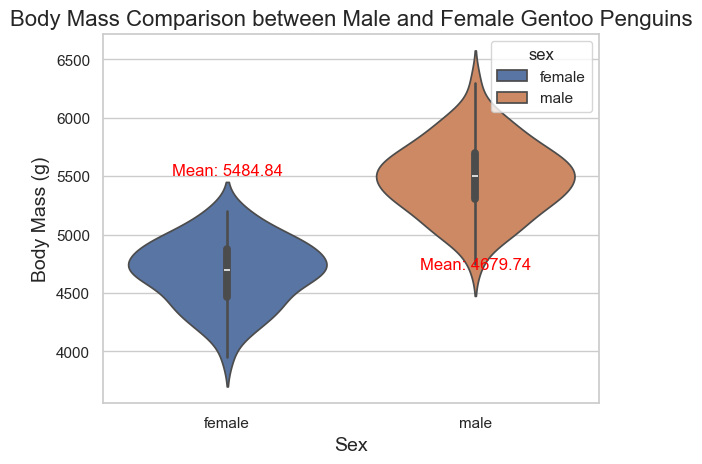

In [58]:
# Separate data for male and female Gentoo penguins
male_data = gentoo_penguins[gentoo_penguins['sex'] == 'male']['body_mass_g']
female_data = gentoo_penguins[gentoo_penguins['sex'] == 'female']['body_mass_g']

# Perform t-test, ignoring NaN values
t_stat, p_value = ttest_ind(male_data, female_data, nan_policy='omit')

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print('There is evidence of a significant difference in body mass between male and female Gentoo penguins.')
else:
    print("There is no significant difference in body mass between male and female Gentoo penguins.")

# Calculate mean values
male_mean = male_data.mean()
female_mean = female_data.mean()

# Set Seaborn style
sns.set(style="whitegrid")

# Create a violin plot
ax = sns.violinplot(x='sex', y='body_mass_g', data=gentoo_penguins, hue='sex')

# Add mean values as text annotations
ax.text(0, male_mean, f'Mean: {male_mean:.2f}', ha='center', va='bottom', color='red', fontsize=12)
ax.text(1, female_mean, f'Mean: {female_mean:.2f}', ha='center', va='bottom', color='red', fontsize=12)

# Add title and labels
plt.title('Body Mass Comparison between Male and Female Gentoo Penguins', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Body Mass (g)', fontsize=14)

# Show the plot
plt.show()

The violin plot visually supports the t-test conclusion.  It clearly represents the distribution of body masses and supports the finding that there is no substantial difference between male and female Gentoo penguins in terms of body mass. 

## References:

* Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/. doi: 10.5281/zenodo.3960218.
* https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests
* https://www.pythonfordatascience.org/independent-samples-t-test-python/
* https://www.tutorialspoint.com/how-to-conduct-a-one-sample-t-test-in-python/